# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

In [1]:
import cv2
import numpy as np
from scipy import signal

%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import utils

/home/baoyu/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
im1_file = 'smile.jpg'
im2_file = 'sad.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

<IPython.core.display.Javascript object>


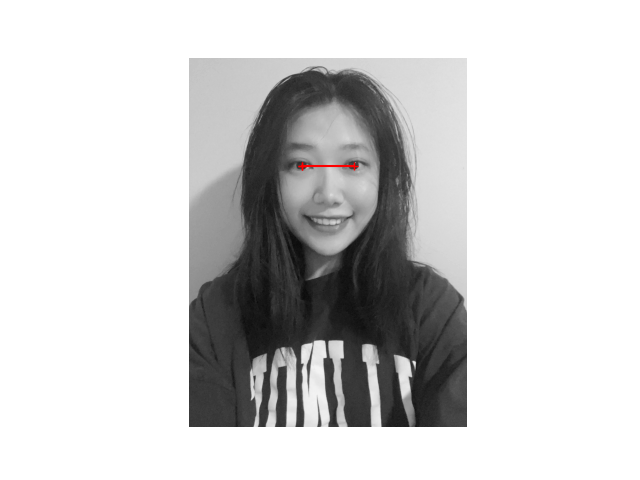

In [3]:
pts_im1 = utils.prompt_eye_selection(im1)
# pts_im1 = np.array([[607, 290], [748, 370]]) # uncomment if entering [x, y] pts manually
# plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

<IPython.core.display.Javascript object>


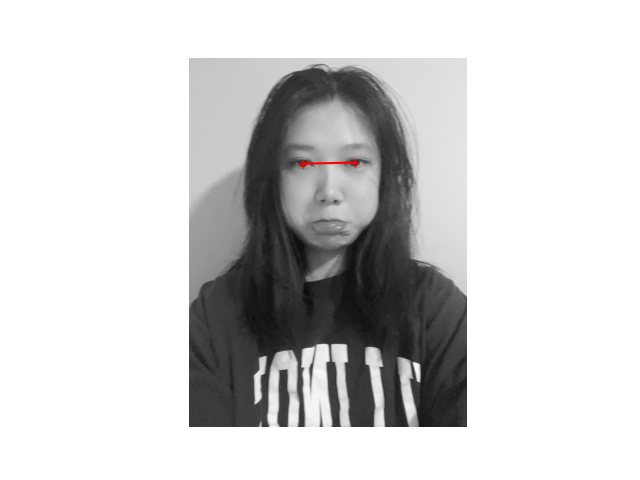

In [5]:
pts_im2 = utils.prompt_eye_selection(im2)
# pts_im2 = np.array([[299,343], [439,331]]) # uncomment if entering [x, y] pts manually
# plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [6]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)

In [7]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

<IPython.core.display.Javascript object>


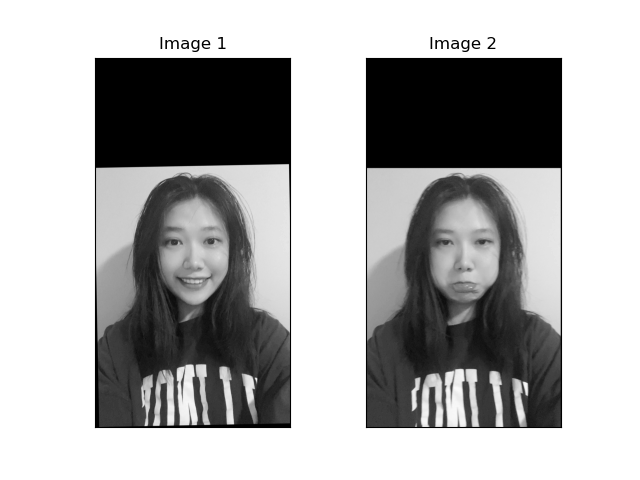

(Text(0.5, 1.0, 'Image 2'), [], [])

In [8]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([])

In [9]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  

    # your code goes here
    # low pass filter: standard 2D Gaussian kernel
    low_pass_filter = utils.gaussian_kernel(sigma_low, 3*sigma_low)
    low_filtered_img = cv2.filter2D(im2, -1, low_pass_filter)
    
    # high pass filter: impulse kernel - Gaussian kernel
    high_pass_filter = utils.gaussian_kernel(sigma_high, 3*sigma_high)
    high_filtered_img = im1 - cv2.filter2D(im1, -1, high_pass_filter)
    
    # combine the two images
    hybrid_img = low_filtered_img + high_filtered_img
    
    return low_filtered_img, high_filtered_img, hybrid_img
    


In [34]:
sigma_low = 25 # choose parameters that work for your images
sigma_high = 30

low_filtered_img, high_filtered_img, hybrid_img = hybridImage(im1, im2, sigma_low, sigma_high)


<IPython.core.display.Javascript object>


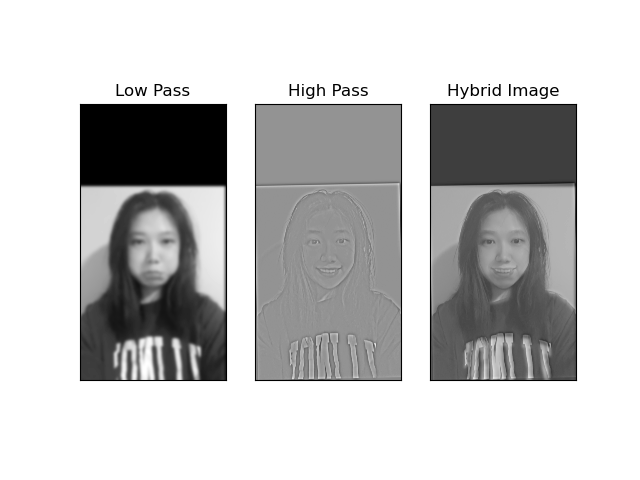

(Text(0.5, 1.0, 'Hybrid Image'), [], [])

In [35]:
# show the low pass, high pass, and hybrid images
fig, axes = plt.subplots(1, 3)
axes[0].imshow(low_filtered_img,cmap='gray')
axes[0].set_title('Low Pass'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(high_filtered_img,cmap='gray')
axes[1].set_title('High Pass'), axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(hybrid_img,cmap='gray')
axes[2].set_title('Hybrid Image'), axes[2].set_xticks([]), axes[2].set_yticks([])


<IPython.core.display.Javascript object>


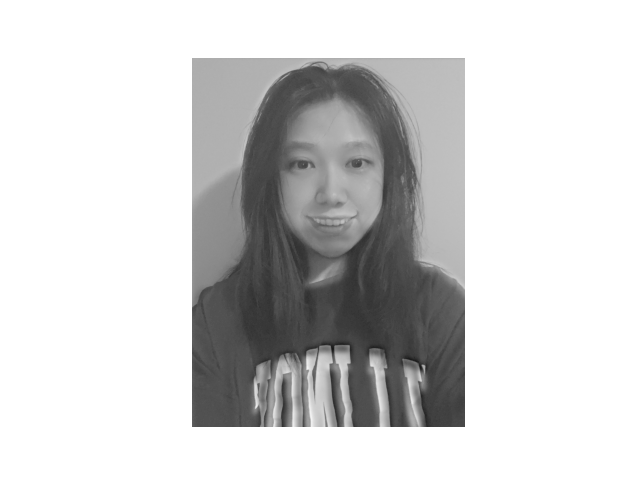

In [37]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(hybrid_img)

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

#### Color enhancement 

#### Color shift